In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [6]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[["Sex", 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


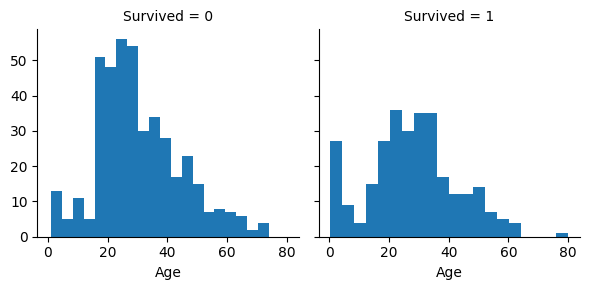

In [12]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

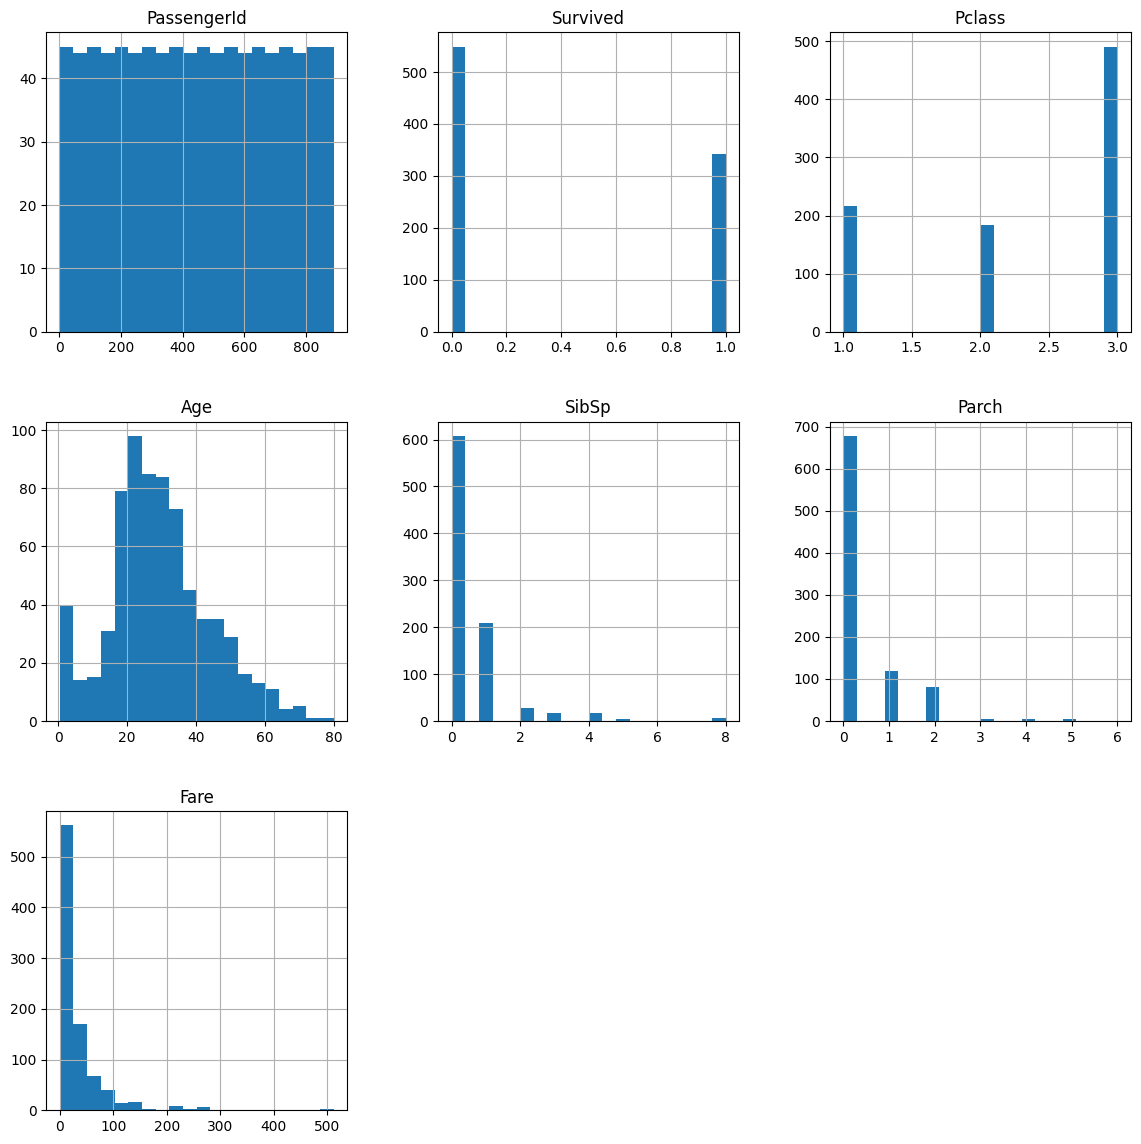

In [13]:
train_df.hist(figsize=(14,14),bins=20)
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

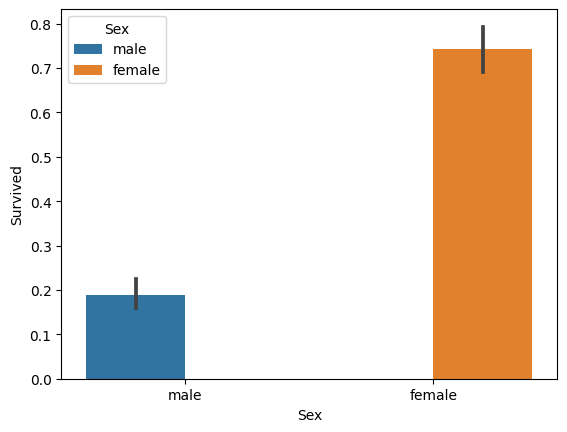

In [14]:
sns.barplot(data=train_df,x='Sex',y="Survived",hue='Sex')

<Axes: xlabel='Pclass', ylabel='Survived'>

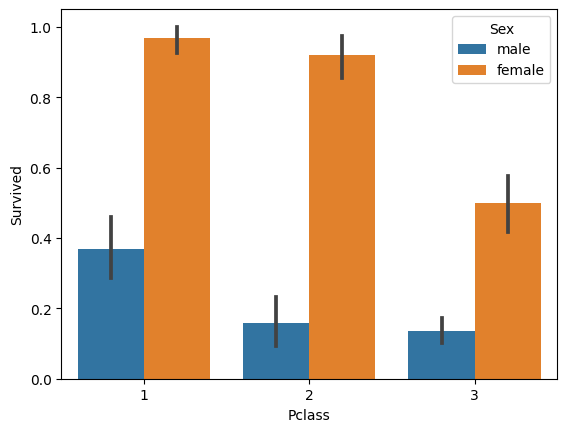

In [15]:
sns.barplot(x="Pclass",y="Survived",hue="Sex", data=train_df)

<Axes: xlabel='Pclass', ylabel='Age'>

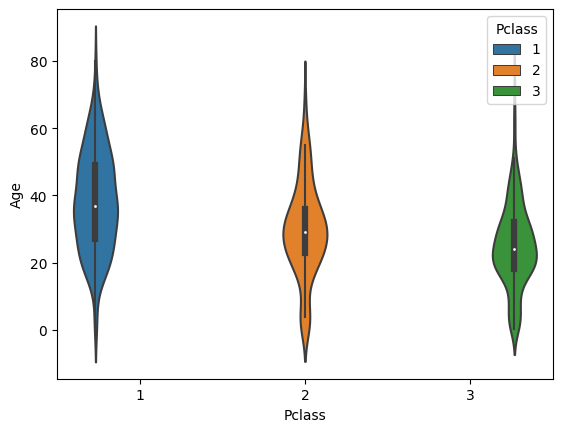

In [16]:
sns.violinplot(data=train_df,x='Pclass',y='Age',hue='Pclass')

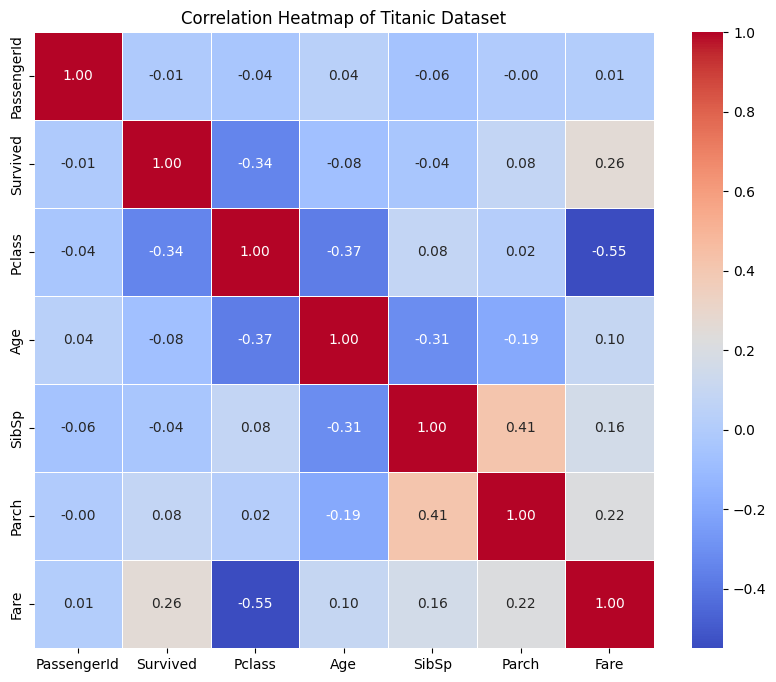

In [17]:
correlation_matrix = train_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,
cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


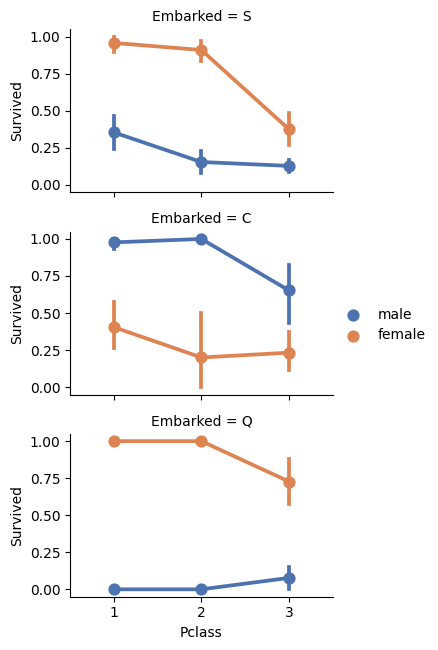

In [18]:
grid = sns.FacetGrid(train_df,row='Embarked',height=2.2,aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived','Sex', palette='deep')
grid.add_legend()

In [19]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
print('counts of missing value (train) =>', train_df['Embarked'].isnull().sum())
print('-'*40)
print(train_df['Embarked'].value_counts())
print('-'*40)
print('counts of missing value (test) =>', test_df['Embarked'].isnull().sum())
print('-'*40)
print(test_df['Embarked'].value_counts())

counts of missing value (train) => 2
----------------------------------------
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
----------------------------------------
counts of missing value (test) => 0
----------------------------------------
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


In [22]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')
embarked_mapping = {'S':1,'C':2,'Q':3}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping).astype(int)
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping).astype(int)

In [23]:
print('counts of missing value (train) =>', train_df['Embarked'].isnull().sum())
print('-'*40)
print(train_df['Embarked'].value_counts())
print('-'*40)
print('counts of missing value (test) =>', test_df['Embarked'].isnull().sum())
print('-'*40)
print(test_df['Embarked'].value_counts())

counts of missing value (train) => 0
----------------------------------------
Embarked
1    646
2    168
3     77
Name: count, dtype: int64
----------------------------------------
counts of missing value (test) => 0
----------------------------------------
Embarked
1    270
2    102
3     46
Name: count, dtype: int64


In [24]:
train_df['Title'] = train_df.Name.str.extract('([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df.Name.str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [25]:
train_df['Title'] = train_df['Title'].replace(['Lady','Countess','Capt','Col','Don',\
                                               'Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
train_df['Title'] = train_df['Title'].replace(['Mlle'],'Miss')
train_df['Title'] = train_df['Title'].replace(['Ms'],'Miss')
train_df['Title'] = train_df['Title'].replace(['Mme'],'Mrs')

test_df['Title'] = test_df['Title'].replace(['Lady','Countess','Capt','Col','Don',\
                                             'Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
test_df['Title'] = test_df['Title'].replace(['Mlle'],'Miss')
test_df['Title'] = test_df['Title'].replace(['Ms'],'Miss')
test_df['Title'] = test_df['Title'].replace(['Mme'],'Mrs')

Text(0.5, 0, 'Title')

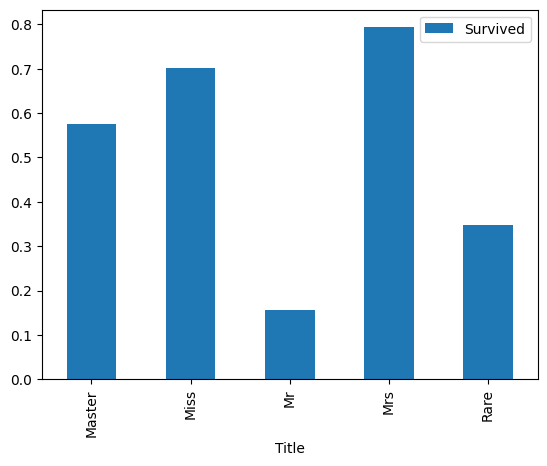

In [26]:
title_survived = train_df.groupby('Title', as_index=False)['Survived'].mean()
title_survived.plot('Title',kind='bar', ).set_xlabel('Title')

In [27]:
title_mapping={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
train_df['Title']=train_df['Title'].map(title_mapping).astype(int)
test_df['Title']=test_df['Title'].map(title_mapping).astype(int)

In [28]:
print('counts of missing value (train) =>', train_df['Title'].isnull().sum())
print('-'*40)
print(train_df['Title'].value_counts())
print('-'*40)
print('counts of missing value (test) =>', test_df['Title'].isnull().sum())
print('-'*40)
print(test_df['Title'].value_counts())

counts of missing value (train) => 0
----------------------------------------
Title
1    517
2    185
3    126
4     40
5     23
Name: count, dtype: int64
----------------------------------------
counts of missing value (test) => 0
----------------------------------------
Title
1    240
2     79
3     72
4     21
5      6
Name: count, dtype: int64


In [29]:
sex_mapping = {'male':1,'female':2}
train_df['Sex'] = train_df['Sex'].map(sex_mapping).astype(int)
test_df['Sex'] = test_df['Sex'].map(sex_mapping).astype(int)

In [30]:
print('counts of missing value (train) =>', train_df['Sex'].isnull().sum())
print('-'*40)
print(train_df['Sex'].value_counts())
print('-'*40)
print('counts of missing value (test) =>', test_df['Sex'].isnull().sum())
print('-'*40)
print(test_df['Sex'].value_counts())

counts of missing value (train) => 0
----------------------------------------
Sex
1    577
2    314
Name: count, dtype: int64
----------------------------------------
counts of missing value (test) => 0
----------------------------------------
Sex
1    266
2    152
Name: count, dtype: int64


In [31]:
train_df.groupby('Title')['Age'].median()

Title
1    30.0
2    21.0
3    35.0
4     3.5
5    48.5
Name: Age, dtype: float64

In [32]:
test_df.groupby('Title')['Age'].median()

Title
1    28.5
2    22.0
3    36.5
4     7.0
5    44.0
Name: Age, dtype: float64

In [33]:
train_df['Age']=train_df['Age'].fillna(train_df.groupby('Title')['Age'].transform('median'))
test_df['Age']=test_df['Age'].fillna(test_df.groupby('Title')['Age'].transform('median'))

In [34]:
train_df['Age'] = train_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

In [35]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 8)
train_df.groupby('AgeBand', as_index=False, observed=False)['Survived'].mean().sort_values(by = 'AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 10.0]",0.588235
1,"(10.0, 20.0]",0.379310
2,"(20.0, 30.0]",0.310881
3,"(30.0, 40.0]",0.482558
4,"(40.0, 50.0]",0.388235
5,"(50.0, 60.0]",0.404762
6,"(60.0, 70.0]",0.222222
7,"(70.0, 80.0]",0.250000


In [36]:
train_df['AgeBand'] = pd.cut(train_df['Age'], bins = 8, labels = [0,1,2,3,4,5,6,7])
train_df.groupby('AgeBand', as_index=False,observed=False)['Survived'].mean().sort_values(by = 'AgeBand', ascending=True)

,AgeBand,Survived
0,0,0.588235
1,1,0.379310
2,2,0.310881
3,3,0.482558
4,4,0.388235
5,5,0.404762
6,6,0.222222
7,7,0.250000


In [37]:
test_df.loc[(test_df['Age'] <= 10), 'AgeBand'] = 0
test_df.loc[(test_df['Age'] > 10) & (test_df['Age'] <= 20), 'AgeBand'] = 1
test_df.loc[(test_df['Age'] > 20) & (test_df['Age'] <= 30), 'AgeBand'] = 2
test_df.loc[(test_df['Age'] > 30) & (test_df['Age'] <= 40), 'AgeBand'] = 3
test_df.loc[(test_df['Age'] > 40) & (test_df['Age'] <= 50), 'AgeBand'] = 4
test_df.loc[(test_df['Age'] > 50) & (test_df['Age'] <= 60), 'AgeBand'] = 5
test_df.loc[(test_df['Age'] > 60) & (test_df['Age'] <= 70), 'AgeBand'] = 6
test_df.loc[(test_df['Age'] > 70), 'AgeBand'] = 7

In [38]:
train_df['Family'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family'] = test_df['SibSp'] + test_df['Parch'] + 1
train_df.groupby('Family', as_index=False)['Survived'].mean().sort_values(by='Family')

,Family,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [39]:
train_df['Alone'] = 0
train_df.loc[train_df['Family'] == 1, 'Alone'] = 1

test_df['Alone'] = 0
test_df.loc[test_df['Family'] == 1, 'Alone'] = 1

train_df.groupby('Alone', as_index=False)['Survived'].mean()

,Alone,Survived
0,0,0.505650
1,1,0.303538


In [40]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], q=8)
train_df.groupby('FareBand', as_index=False, observed=False)['Survived'].mean().sort_values(by = 'FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.75]",0.207143
1,"(7.75, 7.91]",0.180723
2,"(7.91, 9.841]",0.198198
3,"(9.841, 14.454]",0.407080
4,"(14.454, 24.479]",0.436364
5,"(24.479, 31.0]",0.473214
6,"(31.0, 69.488]",0.481818
7,"(69.488, 512.329]",0.678571


In [41]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], q=8, labels=[0,1,2,3,4,5,6,7])
train_df.groupby('FareBand', as_index=False, observed=False)['Survived'].mean().sort_values(by = 'FareBand', ascending=True)

,FareBand,Survived
0,0,0.207143
1,1,0.180723
2,2,0.198198
3,3,0.407080
4,4,0.436364
5,5,0.473214
6,6,0.481818
7,7,0.678571


In [42]:
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].dropna().median())

test_df.loc[(test_df['Fare'] <= 7.750), 'FareBand'] = 0
test_df.loc[(test_df['Fare'] > 7.750) & (test_df['Fare'] <= 7.910), 'FareBand'] = 1
test_df.loc[(test_df['Fare'] > 7.910) & (test_df['Fare'] <= 9.841), 'FareBand'] = 2
test_df.loc[(test_df['Fare'] > 9.841) & (test_df['Fare'] <= 14.454), 'FareBand'] = 3
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 24.479), 'FareBand'] = 4
test_df.loc[(test_df['Fare'] > 24.479) & (test_df['Fare'] <= 31.000), 'FareBand'] = 5
test_df.loc[(test_df['Fare'] > 31.000) & (test_df['Fare'] <= 69.488), 'FareBand'] = 6
test_df.loc[(test_df['Fare'] > 69.488), 'FareBand'] = 7

In [43]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,Family,Alone,FareBand
0,892,3,"Kelly, Mr. James",1,34,0,0,330911,7.8292,NaN,3,1,3.0,1,1,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,47,1,0,363272,7.0000,NaN,1,3,4.0,2,0,0.0
2,894,2,"Myles, Mr. Thomas Francis",1,62,0,0,240276,9.6875,NaN,3,1,6.0,1,1,2.0
3,895,3,"Wirz, Mr. Albert",1,27,0,0,315154,8.6625,NaN,1,1,2.0,1,1,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22,1,1,3101298,12.2875,NaN,1,3,2.0,3,0,3.0


In [44]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,Family,Alone,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,1,1,2,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38,1,0,PC 17599,71.2833,C85,2,3,3,2,0,7
2,3,1,3,"Heikkinen, Miss. Laina",2,26,0,0,STON/O2. 3101282,7.9250,NaN,1,2,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35,1,0,113803,53.1000,C123,1,3,3,2,0,6
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,1,1,3,1,1,2


In [45]:
label_column = ['Survived']
feature_columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title','AgeBand','Family','Alone','FareBand']
train_feature_df = train_df[feature_columns]
test_feature_df = test_df[feature_columns]
train_label_df = train_df[label_column]
print('train shape = ', train_feature_df.shape, ',test shape =', test_feature_df.shape)

train shape =  (891, 12) ,test shape = (418, 12)


In [46]:
train_feature_df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,Family,Alone,FareBand
0,3,1,22,1,0,7.2500,1,1,2,2,0,0
1,1,2,38,1,0,71.2833,2,3,3,2,0,7


In [47]:
test_feature_df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,Family,Alone,FareBand
0,3,1,34,0,0,7.8292,3,1,3.0,1,1,1.0
1,3,2,47,1,0,7.0000,1,3,4.0,2,0,0.0


In [48]:
from sklearn.preprocessing import StandardScaler

feature_columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked',\
                   'Title','AgeBand','Family','Alone','FareBand']
scaler = StandardScaler()

train_feature_df_scaled = scaler.fit_transform(train_feature_df[feature_columns])
train_feature_df_scaled = pd.DataFrame(train_feature_df_scaled, columns = feature_columns)

test_feature_df_scaled = scaler.fit_transform(test_feature_df[feature_columns])
test_feature_df_scaled = pd.DataFrame(test_feature_df_scaled, columns = feature_columns)


In [49]:
train_feature_df_scaled.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,Family,Alone,FareBand
0,0.827377,-0.737695,-0.555546,0.432793,-0.473674,-0.502445,-0.568837,-0.707550,-0.261285,0.05916,-1.231645,-1.485528
1,-1.566107,1.355574,0.649913,0.432793,-0.473674,0.786845,1.005181,1.235215,0.494576,0.05916,-1.231645,1.514873


In [50]:
x_train = train_feature_df_scaled.to_numpy().astype('float32')
x_test = test_feature_df_scaled.to_numpy().astype('float32')
y_train = train_label_df.to_numpy().astype('float32')

print('x_train.shape = ', x_train.shape,'x_test.shape = ', x_test.shape,'y_train.shape = ', y_train.shape)

x_train.shape =  (891, 12) x_test.shape =  (418, 12) y_train.shape =  (891, 1)


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


model = Sequential()

model.add(Input(shape=(x_train.shape[1],)))  # 첫 번째 레이어로 Input 추가
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax'))

In [52]:
model.compile(optimizer=Adam(learning_rate = 0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# 베스트 모델 저장
checkpoint = ModelCheckpoint(
    "best_model.keras",          # 저장될 파일명
    monitor='val_accuracy',   # 검증 정확도(val_accuracy)를 기준으로 저장
    save_best_only=True,      # 최고 성능일 때만 저장
    mode='max',               # 높은 값이 더 좋은 경우 'max'
    verbose=1
)

# 조기 종료 (선택 사항)
early_stopping = EarlyStopping(
    monitor='val_loss',       # 검증 손실(val_loss)을 기준으로 조기 종료
    patience=15,              # 성능 향상이 없을 경우 10번의 에포크 후 종료
    verbose=1
)

# 3. 모델 학습
hist = model.fit(
    x_train, y_train,
    validation_split=0.2,     # 검증 데이터로 20%를 사용
    epochs=200,
    batch_size=16,
    callbacks=[checkpoint, early_stopping]  # 콜백 추가
)

# hist = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
35/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4996 - loss: 0.9510
Epoch 1: val_accuracy improved from -inf to 0.59777, saving model to best_model.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4972 - loss: 0.9524 - val_accuracy: 0.5978 - val_loss: 0.8423
Epoch 2/200
34/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5379 - loss: 0.8530 
Epoch 2: val_accuracy improved from 0.59777 to 0.64246, saving model to best_model.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5400 - loss: 0.8459 - val_accuracy: 0.6425 - val_loss: 0.7084
Epoch 3/200
35/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6240 - loss: 0.7195 
Epoch 3: val_accuracy improved from 0.64246 to 0.65922, saving model to best_model.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6195 - loss: 0.7170 - val_accuracy: 0.6592 - val_loss: 0.6210
Epoch 4/200
35/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6490 - loss: 0.6297 
Epoch 4: val_accuracy improved from 0.65922 to 0

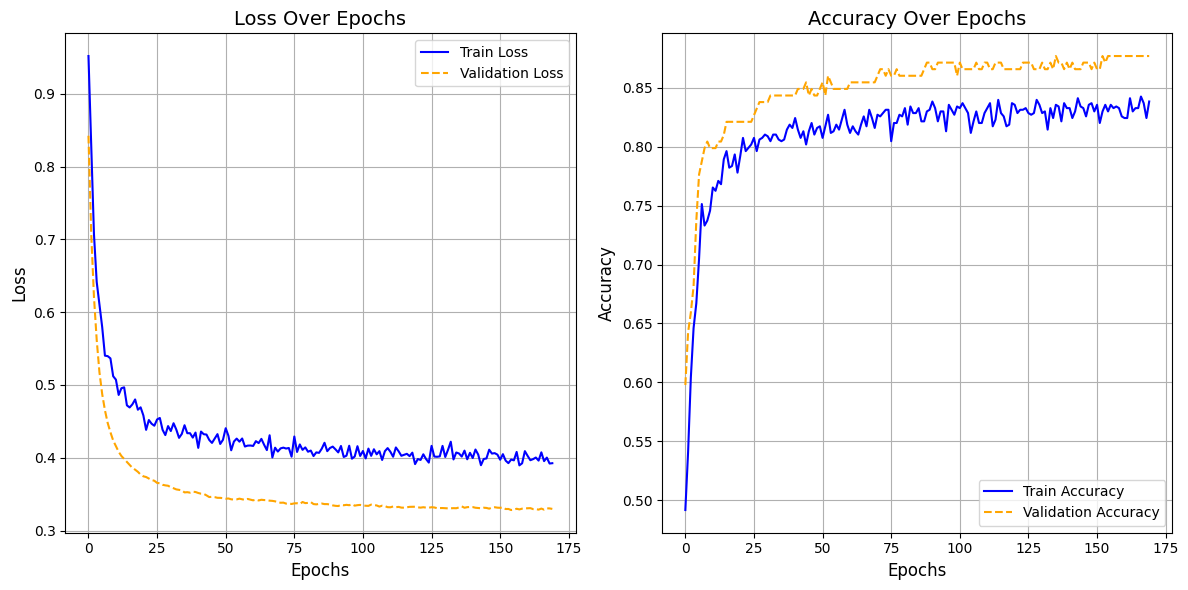

In [53]:
import matplotlib.pyplot as plt

# history 객체에서 학습 기록 불러오기
train_loss = hist.history['loss']          # 훈련 손실
val_loss = hist.history['val_loss']        # 검증 손실
train_accuracy = hist.history['accuracy']  # 훈련 정확도
val_accuracy = hist.history['val_accuracy']  # 검증 정확도

# 1. 손실 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 두 개의 그래프를 나란히 표시
plt.plot(train_loss, label='Train Loss', color='blue', linestyle='-')
plt.plot(val_loss, label='Validation Loss', color='orange', linestyle='--')
plt.title('Loss Over Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

# 2. 정확도 시각화
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy', color='blue', linestyle='-')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange', linestyle='--')
plt.title('Accuracy Over Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [54]:
# survived_prediction = model.predict(x_test)
# print(survived_prediction.shape)

# 4. 베스트 모델 로드 및 테스트 데이터 예측
from tensorflow.keras.models import load_model

best_model = load_model("best_model.keras")  # 저장된 베스트 모델 로드
survived_prediction = best_model.predict(x_test)  # 테스트 데이터 예측
print(survived_prediction.shape)  # 결과 출력

# 5. 예측 결과 변환 (이진 분류 예제)
predicted_classes = survived_prediction.argmax(axis=1)  # 확률이 가장 높은 클래스 선택
print(predicted_classes)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
(418, 2)
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [55]:
# survived_prediction_digit = np.argmax(survived_prediction, axis=1)
# gender_df['Survived'] = survived_prediction_digit
# gender_df.to_csv('submission.csv', index=False)


# # 예측된 확률에서 가장 높은 값을 가진 인덱스를 선택하여 클래스를 예측
# survived_prediction_digit = np.argmax(survived_prediction, axis=1)

# test_feature_df에서 PassengerId 가져오기
submission_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],  # test_df에서 PassengerId 가져오기
    'Survived': predicted_classes  # 예측된 Survived
})

# CSV 파일로 저장 (Kaggle 제출 파일 형식)
submission_df.to_csv('submission.csv', index=False)

print(submission_df.tail())  # 결과를 출력하여 확인

     PassengerId  Survived
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1
